PREDIKSI SAHAM PT ANEKA TAMBANG PERBULAN

Install Pyspark

In [1]:
!pip install pyspark

In [89]:
#Import Library yang dibutuhkan

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import to_date, unix_timestamp, col
from pyspark.sql.types import DateType
from datetime import datetime
from pyspark.sql.types import *

In [81]:
import sys
print(sys.executable)


D:\Anaconda\python.exe


In [82]:
python_executable = "D:\Anaconda\python.exe"

In [3]:
#Inisialisasi SparkSession

spark = SparkSession.builder.appName('PrediksiSaham').getOrCreate()


In [5]:
# Definisi schema kolom-kolom dengan tipe data yang sesuai
schema = StructType([
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Adj Close", FloatType(), True),
    StructField("Volume", DoubleType(), True)
])

In [29]:
# Load Dataset
data = spark.read.csv("antam.csv", header=True, schema=schema)
data.show()

+----------+-----+-----+-----+-----+---------+----------+
|      Date| Open| High|  Low|Close|Adj Close|    Volume|
+----------+-----+-----+-----+-----+---------+----------+
|2018-01-01|625.0|625.0|625.0|625.0|573.29175|       0.0|
|2018-01-02|635.0|645.0|625.0|635.0| 582.4644|  3.6621E7|
|2018-01-03|635.0|655.0|630.0|630.0|577.87805| 4.36076E7|
|2018-01-04|635.0|645.0|635.0|640.0| 587.0508| 1.50649E7|
|2018-01-05|645.0|660.0|645.0|655.0| 600.8098| 4.93237E7|
|2018-01-08|660.0|660.0|640.0|650.0| 596.2234| 3.19205E7|
|2018-01-09|655.0|680.0|650.0|655.0| 600.8098| 5.16889E7|
|2018-01-10|655.0|665.0|645.0|650.0| 596.2234| 2.07743E7|
|2018-01-11|655.0|660.0|645.0|650.0| 596.2234| 1.42357E7|
|2018-01-12|650.0|670.0|645.0|665.0| 609.9824|  6.6859E7|
|2018-01-15|670.0|680.0|660.0|660.0| 605.3962| 5.28282E7|
|2018-01-16|665.0|720.0|665.0|705.0| 646.6731|2.360098E8|
|2018-01-17|705.0|740.0|690.0|730.0|669.60474|2.422831E8|
|2018-01-18|750.0|775.0|730.0|740.0| 678.7774|2.766888E8|
|2018-01-19|74

In [30]:
#Menampilkan skema dataframe
data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: double (nullable = true)



In [31]:
#Mengubah kolom date nenjadi tipe data datetime
data = data.withColumn("Date", to_date("Date", "yyyy-MM-dd"))

In [32]:
data.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: double (nullable = true)



In [33]:
data.show()

+----------+-----+-----+-----+-----+---------+----------+
|      Date| Open| High|  Low|Close|Adj Close|    Volume|
+----------+-----+-----+-----+-----+---------+----------+
|2018-01-01|625.0|625.0|625.0|625.0|573.29175|       0.0|
|2018-01-02|635.0|645.0|625.0|635.0| 582.4644|  3.6621E7|
|2018-01-03|635.0|655.0|630.0|630.0|577.87805| 4.36076E7|
|2018-01-04|635.0|645.0|635.0|640.0| 587.0508| 1.50649E7|
|2018-01-05|645.0|660.0|645.0|655.0| 600.8098| 4.93237E7|
|2018-01-08|660.0|660.0|640.0|650.0| 596.2234| 3.19205E7|
|2018-01-09|655.0|680.0|650.0|655.0| 600.8098| 5.16889E7|
|2018-01-10|655.0|665.0|645.0|650.0| 596.2234| 2.07743E7|
|2018-01-11|655.0|660.0|645.0|650.0| 596.2234| 1.42357E7|
|2018-01-12|650.0|670.0|645.0|665.0| 609.9824|  6.6859E7|
|2018-01-15|670.0|680.0|660.0|660.0| 605.3962| 5.28282E7|
|2018-01-16|665.0|720.0|665.0|705.0| 646.6731|2.360098E8|
|2018-01-17|705.0|740.0|690.0|730.0|669.60474|2.422831E8|
|2018-01-18|750.0|775.0|730.0|740.0| 678.7774|2.766888E8|
|2018-01-19|74

In [34]:
# DF Shape
# Mendapatkan jumlah baris
num_rows = data.count()

# Mendapatkan jumlah kolom
num_columns = len(data.columns)

# Tampilkan informasi "shape"
print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_columns}")

Jumlah baris: 1493
Jumlah kolom: 7


In [35]:
#describe with specific variables
data.describe(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']).show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|              Volume|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|              1492|              1492|              1492|              1492|              1492|                1492|
|   mean|1489.5576407506703|1516.3069705093833|1462.2687667560322|1486.3853887399464|1410.8677421958453|1.2967773512064344E8|
| stddev| 713.8569838952335| 728.0755507850204| 699.4568560753072| 712.5944461395959| 687.8259534687033| 2.028070291473232E8|
|    min|             348.0|             364.0|             338.0|             348.0|         325.17215|                 0.0|
|    max|            3300.0|            3440.0|            3060.0|            3190.0|         2994.5884|         2.186

In [36]:
# Menghapus baris yang memiliki nilai null di kolom-kolom tertentu
data_cleaned = data.na.drop(subset=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [37]:
# Menyimpan nama kolom-kolom yang akan digunakan sebagai fitur dalam analisis atau pemodelan.
features_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Membuat objek VectorAssembler. VectorAssembler adalah transformer dalam PySpark yang menggabungkan beberapa kolom menjadi satu vektor kolom. InputCols menyatakan kolom-kolom yang akan digabungkan, dan OutputCol adalah nama kolom hasil gabungan.
assembler = VectorAssembler(inputCols=features_cols, outputCol="features")

#Menggunakan VectorAssembler untuk mentransformasikan DataFrame
data_vec = assembler.transform(data_cleaned)

data_vec.show()

+----------+-----+-----+-----+-----+---------+----------+--------------------+
|      Date| Open| High|  Low|Close|Adj Close|    Volume|            features|
+----------+-----+-----+-----+-----+---------+----------+--------------------+
|2018-01-01|625.0|625.0|625.0|625.0|573.29175|       0.0|[625.0,625.0,625....|
|2018-01-02|635.0|645.0|625.0|635.0| 582.4644|  3.6621E7|[635.0,645.0,625....|
|2018-01-03|635.0|655.0|630.0|630.0|577.87805| 4.36076E7|[635.0,655.0,630....|
|2018-01-04|635.0|645.0|635.0|640.0| 587.0508| 1.50649E7|[635.0,645.0,635....|
|2018-01-05|645.0|660.0|645.0|655.0| 600.8098| 4.93237E7|[645.0,660.0,645....|
|2018-01-08|660.0|660.0|640.0|650.0| 596.2234| 3.19205E7|[660.0,660.0,640....|
|2018-01-09|655.0|680.0|650.0|655.0| 600.8098| 5.16889E7|[655.0,680.0,650....|
|2018-01-10|655.0|665.0|645.0|650.0| 596.2234| 2.07743E7|[655.0,665.0,645....|
|2018-01-11|655.0|660.0|645.0|650.0| 596.2234| 1.42357E7|[655.0,660.0,645....|
|2018-01-12|650.0|670.0|645.0|665.0| 609.9824|  6.68

In [94]:
data_vec.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: double (nullable = true)
 |-- features: vector (nullable = true)



In [43]:
# Membagi data menjadi data latih dan data uji
# Membagi data menjadi data latih dan data uji
(training_data, testing_data) = data_vec.randomSplit([0.8, 0.2], seed=42)

# Periksa data latih
print("Jumlah data latih:", training_data.count())

# Periksa data uji
print("Jumlah data uji:", testing_data.count())

Jumlah data latih: 1236
Jumlah data uji: 256


In [46]:
# Membuat objek model regresi linier
model = LinearRegression(featuresCol='features', labelCol='Close') 

# Melatih model menggunakan data latih
lr_model = model.fit(training_data)

# Periksa koefisien dan intercept dari model
print("Koefisien:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)


Koefisien: [-2.582342020861751e-13,3.85081251788635e-13,2.754677479816081e-13,0.9999999999994333,1.6758284754187149e-13,-5.350642341951812e-21]
Intercept: 4.498143332012359e-12


Evaluasi

In [47]:
from pyspark.ml.evaluation import RegressionEvaluator

# Memprediksi harga penutupan menggunakan data uji
predictions = lr_model.transform(testing_data)

# Menampilkan hasil prediksi dan kolom target aktual
predictions.select("prediction", "Close").show()

# Evaluasi kinerja model (opsional)
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data =", rmse)


+-----------------+-----+
|       prediction|Close|
+-----------------+-----+
| 630.000000000006|630.0|
|655.0000000000056|655.0|
|649.9999999999987|650.0|
|740.0000000000034|740.0|
|855.0000000000011|855.0|
|909.9999999999928|910.0|
|829.9999999999966|830.0|
|919.9999999999934|920.0|
|910.0000000000022|910.0|
|904.9999999999944|905.0|
|884.9999999999894|885.0|
|850.0000000000002|850.0|
|879.9999999999949|880.0|
|820.0000000000048|820.0|
|770.0000000000018|770.0|
|804.9999999999974|805.0|
|884.9999999999937|885.0|
|879.9999999999945|880.0|
|994.9999999999976|995.0|
|904.9999999999952|905.0|
+-----------------+-----+
only showing top 20 rows

Root Mean Squared Error (RMSE) on test data = 8.545229889710028e-12


In [48]:
# Membuat evaluator untuk menghitung MSE
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="mse")

# Memprediksi harga penutupan menggunakan data uji
predictions = lr_model.transform(testing_data)

# Menghitung MSE
mse = evaluator.evaluate(predictions)
print("Mean Squared Error (MSE) on test data =", mse)


Mean Squared Error (MSE) on test data = 7.302095386799366e-23


In [50]:
# Membuat evaluator untuk menghitung R-squared
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="r2")

# Memprediksi harga penutupan menggunakan data uji
predictions = lr_model.transform(testing_data)

# Menghitung R-squared
r2 = evaluator.evaluate(predictions)
print("R-squared on test data =", r2)


R-squared on test data = 1.0


In [63]:
predictions = lr_model.transform(testing_data)

# Asumsikan "prediction" adalah kolom yang berisi nilai prediksi dan "Close" adalah nilai aktual
# Menghitung deviasi
predictions = predictions.withColumn("Deviation", (col("prediction") - col("Close")) / col("Close"))

# Calculate relative accuracy in percentage
accuracy_percentage = (1 - predictions.agg({"Deviation": "mean"}).collect()[0][0]) * 100

print(f"Akurasi Relatif Model: {accuracy_percentage:.2f}%")

Akurasi Relatif Model: 100.00%


Prediksi

In [115]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as F

# Assuming data_vec is a Spark DataFrame
terakhir_price = data_vec.select('Close').orderBy(F.desc('Date')).first()['Close']
future_harga = [terakhir_price * (1 + i/100) for i in range(1, 11)]

# Ensure that 'Date' is a proper date type
data_vec = data_vec.withColumn('Date', F.col('Date').cast('date'))

# Prediksi harga saham di masa depan
tgl = pd.date_range(start=data_vec.agg({"Date": "max"}).collect()[0][0], periods=10, freq='M')

# Rename 'Date' to something else, for example, 'Tanggal'
predictions_df = pd.DataFrame({'Tanggal': tgl, 'Prediksi Harga': future_harga})
print("\nPrediksi Harga Saham di Masa Depan:")
print(predictions_df)



Prediksi Harga Saham di Masa Depan:
     Tanggal  Prediksi Harga
0 2023-12-31         1722.05
1 2024-01-31         1739.10
2 2024-02-29         1756.15
3 2024-03-31         1773.20
4 2024-04-30         1790.25
5 2024-05-31         1807.30
6 2024-06-30         1824.35
7 2024-07-31         1841.40
8 2024-08-31         1858.45
9 2024-09-30         1875.50


Visualisasi

In [126]:
# Mendapatkan koefisien kemiringan dan intersep dari model regresi linear
slope = lr_model.coefficients[0]
intercept = lr_model.intercept

# Menghitung prediksi harga menggunakan fungsi linier
X = np.array(data_pd['Close'])
y_regression = slope * X + intercept


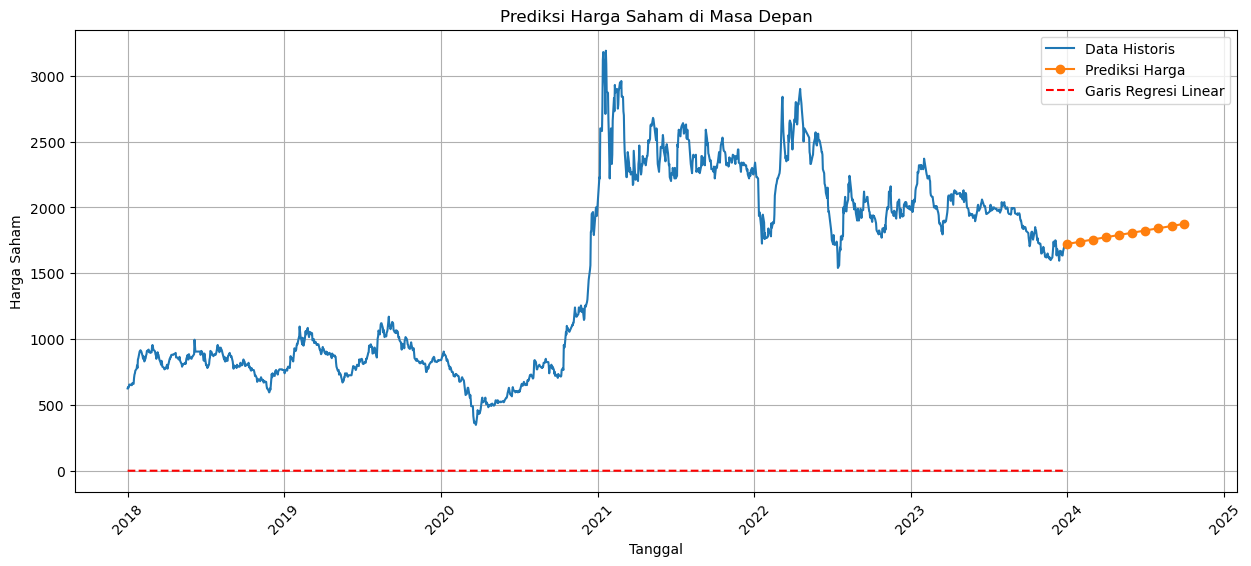

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window


# Convert PySpark DataFrame to Pandas for plotting
data_pd = data_vec.toPandas()


# Convert NumPy array to Pandas DataFrame
y_regression_pd = pd.DataFrame({'Tanggal': data_pd['Date'], 'y_regression': y_regression})


# Plotting
plt.figure(figsize=(15, 6))
plt.plot(data_pd['Date'], data_pd['Close'], label='Data Historis')
plt.plot(predictions_df['Tanggal'], predictions_df['Prediksi Harga'], marker='o', linestyle='-', label='Prediksi Harga')
plt.plot(y_regression_pd['Tanggal'], y_regression_pd['y_regression'], color='red', linestyle='--', label='Garis Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham di Masa Depan')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
